In [13]:
from numpy import unique
from numpy import where
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/clustering_data.csv')

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2


In [4]:
df.shape

(614, 11)

In [5]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.838762,0.421752,0.0,1.00,1.0,1.00,2.0
Married,614.0,0.657980,0.484971,0.0,0.00,1.0,1.00,2.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.237785,0.534737,0.0,0.00,0.0,0.00,2.0
ApplicantIncome,614.0,247.117264,143.537853,0.0,120.25,244.5,369.75,504.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [7]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.744300,0.218241,0.237785,247.117264,1621.245798,146.412162,342.410423,0.855049,1.037459
std,0.421752,0.484971,1.009623,0.413389,0.534737,143.537853,2926.248369,84.037468,64.428629,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,2.000000,2.000000,3.000000,1.000000,2.000000,504.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [8]:
x = df.values

In [9]:
model_brch = Birch(threshold=0.09, n_clusters=2)

In [10]:
model_brch.fit(x)

Birch(n_clusters=2, threshold=0.09)

In [11]:
preds = model_brch.predict(x)

In [12]:
clusters = unique(preds)

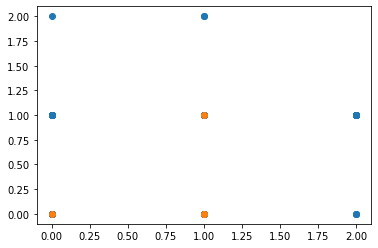

In [14]:
for cluster in clusters:
    row_ix = where(preds == cluster)
    plt.scatter(x[row_ix, 0], x[row_ix, 1])
plt.show()